
Remove StandardHours and OVer18 columns because all the values are same. Remove BusinessTravel as 71% of employees travel rarely. Remove Daily Rate, Hourly Rate and Monthly Rate because these are all derived attributes to reduce multi-collinearity(dimensionality reduction). Remove EmployeeCount as the value is 1 for all.

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

MaritialStatus 1 'Single' 2 'Married' 3 'Divorced'

Gender 1 'Male' 2 'Female'

JobRole 1 'Sales Executive' 2 'Research Scientist' 3 'Laboratory Technician' 4 'Manufacturing Director' 5 'Healthcare Representative' 6 'Manager' 7 'Sales Representative' 8 'Research Director' 9 'Human Resources'

OverTime 1 'Yes' 2 'No'

Department 1 'Sales' 2 'Research & Development' 3 'Human Resources'

Attrition 1 'Yes' 2 'No'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('hr_dataset.csv')

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
data.shape

(1470, 35)

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


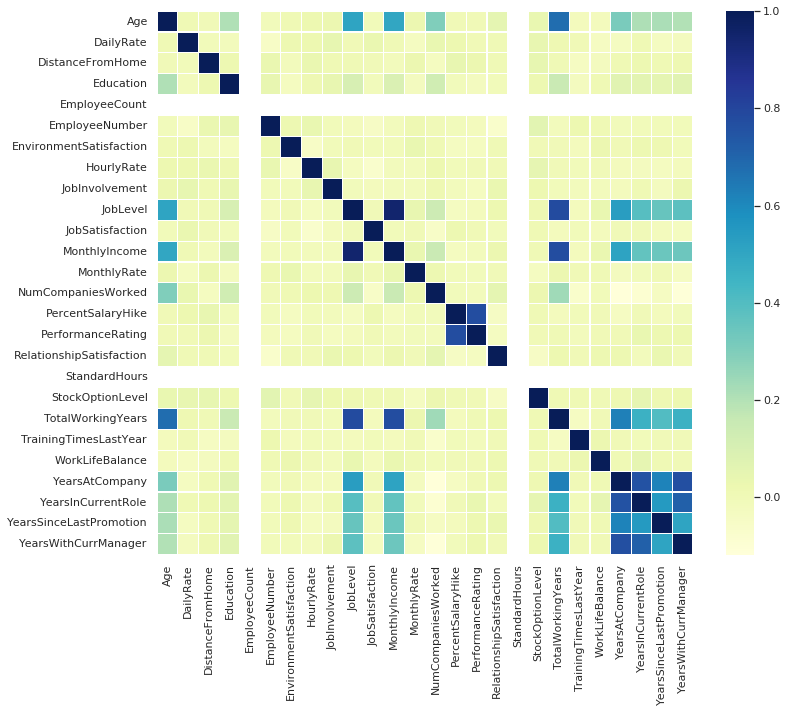

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [12]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [14]:
data.Over18.unique()

array(['Y'], dtype=object)

In [15]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [17]:
data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [18]:
df=data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','DailyRate','MonthlyRate','HourlyRate'])

In [19]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [21]:
df.to_csv('final_dataset.csv')

In [22]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,7,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [23]:
df.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

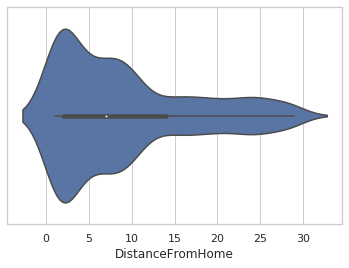

In [25]:
sns.set_theme(style="whitegrid")
age_vplot = sns.violinplot(x=df["DistanceFromHome"])

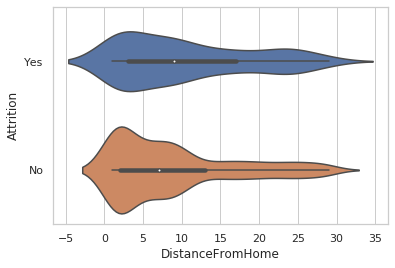

In [26]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["DistanceFromHome"], y=df["Attrition"])

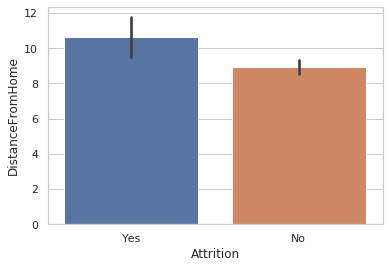

In [27]:
sns.barplot(x = 'Attrition',y = 'DistanceFromHome',data = df)

In [28]:
new_df= pd.get_dummies(df,columns=['MaritalStatus'])

In [29]:
new_df = new_df.rename(columns = {'MaritalStatus_Single': 'MaritalStatus'}, inplace = False)

In [31]:
new_df=new_df.drop(columns=["MaritalStatus_Married"],axis=1)

In [32]:
new_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Divorced,MaritalStatus
0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,3,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,...,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Research & Development,2,2,Other,4,4,Male,2,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,3,...,0,8,3,3,8,7,3,0,0,0
4,27,No,Research & Development,2,1,Medical,7,1,Male,3,...,1,6,3,3,2,2,2,2,0,0


In [34]:
new_df.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [35]:
new_df.MaritalStatus.value_counts()

0    1000
1     470
Name: MaritalStatus, dtype: int64

In [36]:
(new_df.groupby(["JobInvolvement","MaritalStatus"]).count()["JobLevel"])

JobInvolvement  MaritalStatus
1               0                 55
                1                 28
2               0                246
                1                129
3               0                591
                1                277
4               0                108
                1                 36
Name: JobLevel, dtype: int64

In [39]:
du=(new_df.groupby(["JobInvolvement","MaritalStatus"]).count()["JobLevel"]/df.groupby(["JobInvolvement"]).count()["JobLevel"])
du=du.to_frame()
du=du.rename(columns = {'JobLevel': 'Count'}, inplace = False)
du

Count
JobInvolvement MaritalStatus          
1              0              0.662651
               1              0.337349
2              0              0.656000
               1              0.344000
3              0              0.680876
               1              0.319124
4              0              0.750000
               1              0.250000

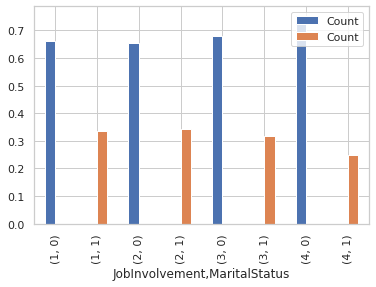

In [40]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [41]:
du=(new_df.groupby(["JobInvolvement","Attrition"]).count()["Age"]/df.groupby(["JobInvolvement"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobInvolvement Attrition          
1              No         0.662651
               Yes        0.337349
2              No         0.810667
               Yes        0.189333
3              No         0.855991
               Yes        0.144009
4              No         0.909722
               Yes        0.090278

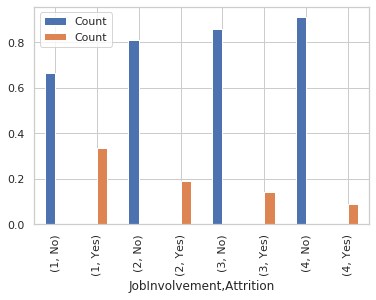

In [42]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [47]:
new_df.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

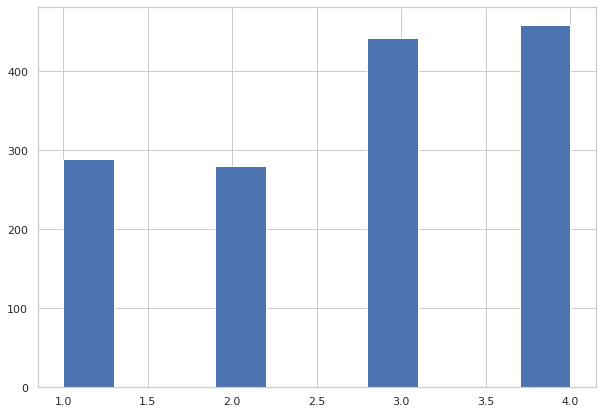

In [48]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["JobSatisfaction"])
plt.show()

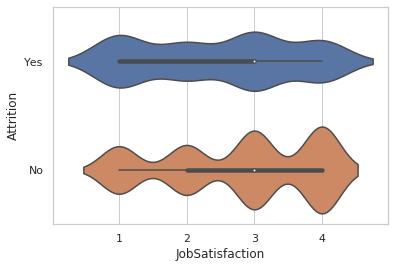

In [49]:
sns.set_theme(style="whitegrid")
age_gen_vplot = sns.violinplot(x=df["JobSatisfaction"], y=df["Attrition"])

In [52]:
du=(new_df.groupby(["JobSatisfaction","Attrition"]).count()["OverTime"]/df.groupby(["JobSatisfaction"]).count()["OverTime"])
du=du.to_frame()
du=du.rename(columns = {'OverTime': 'Count'}, inplace = False)
du

Count
JobSatisfaction Attrition          
1               No         0.771626
                Yes        0.228374
2               No         0.835714
                Yes        0.164286
3               No         0.834842
                Yes        0.165158
4               No         0.886710
                Yes        0.113290

In [54]:
new_df.MonthlyIncome.value_counts()

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [55]:
du=(new_df.groupby(["MonthlyIncome","Attrition"]).count()["OverTime"]/df.groupby(["MonthlyIncome"]).count()["OverTime"])
du=du.to_frame()
du=du.rename(columns = {'OverTime': 'Count'}, inplace = False)
du

,,Count
MonthlyIncome,Attrition,
1009,Yes,1.0
1051,No,1.0
1052,No,1.0
1081,Yes,1.0
1091,Yes,1.0
...,...,...
19859,Yes,1.0
19926,No,1.0
19943,No,1.0


In [56]:
new_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

(array([606.,   0.,  82.,   0., 464.,   0., 159.,   0., 132.,  27.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

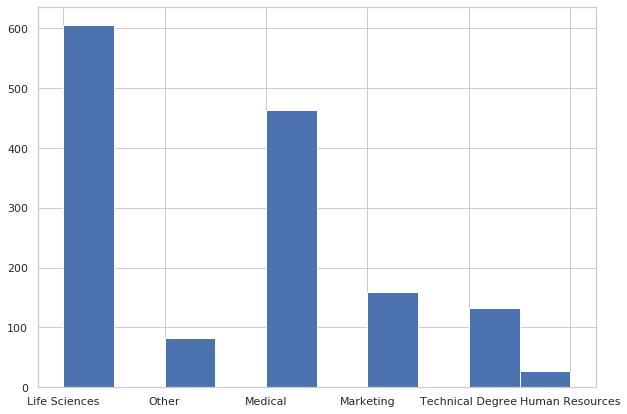

In [57]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["EducationField"])

In [58]:
du=(new_df.groupby(["EducationField","Education","JobInvolvement"]).count()["Age"]/df.groupby(["EducationField","Education"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   Education JobInvolvement          
Human Resources  1         1               0.500000
                           2               0.500000
                 2         3               1.000000
                 3         1               0.062500
                           2               0.312500
...                                             ...
Technical Degree 4         1               0.032258
                           2               0.258065
                           3               0.709677
                 5         2               0.666667
                           3               0.333333

[100 rows x 1 columns]

In [60]:
du=(new_df.groupby(["EducationField","JobInvolvement","Attrition"]).count()["Age"]/df.groupby(["EducationField"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
EducationField   JobInvolvement Attrition          
Human Resources  1              No         0.037037
                                Yes        0.037037
                 2              No         0.185185
                                Yes        0.111111
                 3              No         0.370370
                                Yes        0.074074
                 4              No         0.148148
                                Yes        0.037037
Life Sciences    1              No         0.042904
                                Yes        0.019802
                 2              No         0.202970
                                Yes        0.041254
                 3              No         0.516502
                                Yes        0.074257
                 4              No         0.090759
                                Yes        0.011551
Marketing        1              No         0.012579
                                Yes        0.031447
                 2              No         0.213836
                                Yes        0.062893
                 3              No         0.509434
                                Yes        0.113208
                 4              No         0.044025
                                Yes        0.012579
Medical          1              No         0.043103
                                Yes        0.012931
                 2              No         0.206897
                                Yes        0.043103
                 3              No         0.506466
                                Yes        0.077586
                 4              No         0.107759
                                Yes        0.002155
Other            1              No         0.036585
                                Yes        0.012195
                 2              No         0.256098
                                Yes        0.036585
                 3              No         0.500000
                                Yes        0.073171
                 4              No         0.073171
                                Yes        0.012195
Technical Degree 1              No         0.022727
                                Yes        0.022727
                 2              No         0.189394
                                Yes        0.075758
                 3              No         0.477273
                                Yes        0.136364
                 4              No         0.068182
                                Yes        0.007576

In [67]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

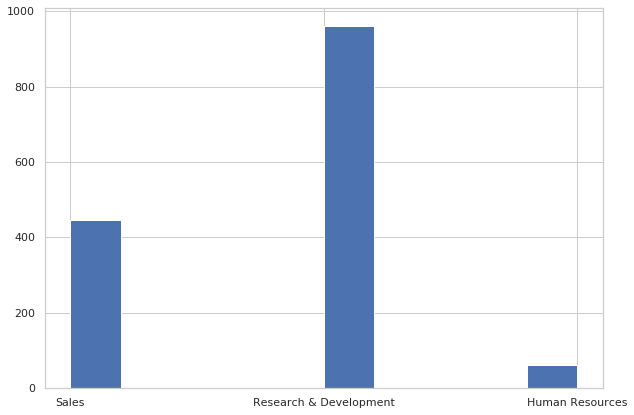

In [68]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["Department"])
plt.show()

In [76]:
(df.groupby(["JobRole","JobInvolvement"]).count()["Age"])

JobRole                    JobInvolvement
Healthcare Representative  1                   7
                           2                  37
                           3                  71
                           4                  16
Human Resources            1                   3
                           2                  14
                           3                  30
                           4                   5
Laboratory Technician      1                  19
                           2                  67
                           3                 147
                           4                  26
Manager                    1                   4
                           2                  23
                           3                  67
                           4                   8
Manufacturing Director     1                   8
                           2                  42
                           3                  83
                           

In [78]:
du=(df.groupby(["JobRole","JobInvolvement"]).count()["Age"]/df.groupby(["JobRole"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobRole                   JobInvolvement          
Healthcare Representative 1               0.053435
                          2               0.282443
                          3               0.541985
                          4               0.122137
Human Resources           1               0.057692
                          2               0.269231
                          3               0.576923
                          4               0.096154
Laboratory Technician     1               0.073359
                          2               0.258687
                          3               0.567568
                          4               0.100386
Manager                   1               0.039216
                          2               0.225490
                          3               0.656863
                          4               0.078431
Manufacturing Director    1               0.055172
                          2               0.289655
                          3               0.572414
                          4               0.082759
Research Director         1               0.050000
                          2               0.225000
                          3               0.625000
                          4               0.100000
Research Scientist        1               0.041096
                          2               0.243151
                          3               0.592466
                          4               0.123288
Sales Executive           1               0.058282
                          2               0.254601
                          3               0.601227
                          4               0.085890
Sales Representative      1               0.084337
                          2               0.240964
                          3               0.614458
                          4               0.060241

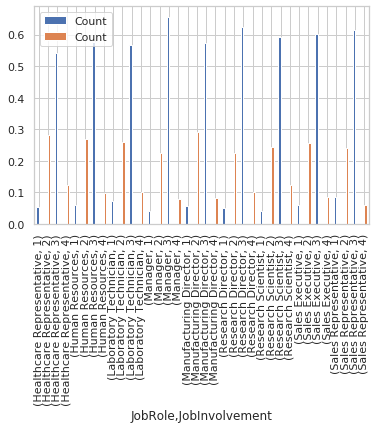

In [79]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [80]:
du=(df.groupby(["JobRole","Attrition"]).count()["Age"]/df.groupby(["JobRole"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)
du

Count
JobRole                   Attrition          
Healthcare Representative No         0.931298
                          Yes        0.068702
Human Resources           No         0.769231
                          Yes        0.230769
Laboratory Technician     No         0.760618
                          Yes        0.239382
Manager                   No         0.950980
                          Yes        0.049020
Manufacturing Director    No         0.931034
                          Yes        0.068966
Research Director         No         0.975000
                          Yes        0.025000
Research Scientist        No         0.839041
                          Yes        0.160959
Sales Executive           No         0.825153
                          Yes        0.174847
Sales Representative      No         0.602410
                          Yes        0.397590

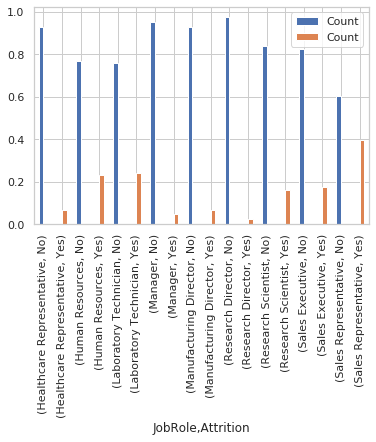

In [81]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar()

In [82]:
new_df= pd.get_dummies(new_df, columns = ['Attrition'])
new_df.head()

,Age,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales,Attrition_No,Attrition_Yes
0,41,1,2,Life Sciences,1,2,Female,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,8,1,Life Sciences,2,3,Male,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,2,2,Other,4,4,Male,2,1,3,...,0,0,0,0,0,0,1,0,0,1
3,33,3,4,Life Sciences,5,4,Female,3,1,3,...,0,0,1,0,0,0,1,0,1,0
4,27,2,1,Medical,7,1,Male,3,1,2,...,0,0,0,0,0,0,1,0,1,0


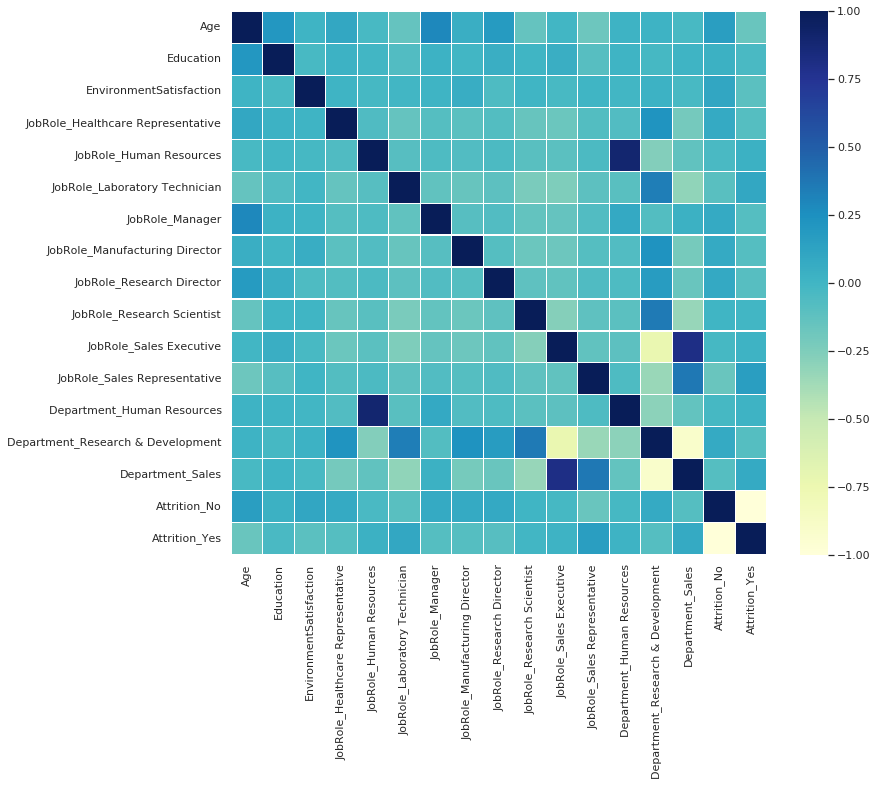

In [87]:
corrmat = new_df.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)